<a href="https://colab.research.google.com/github/YJJasdasdasd/deeplearning/blob/master/%EA%B8%80%EC%9E%90%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import tensorflow as tf

In [50]:
# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (x_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (x_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


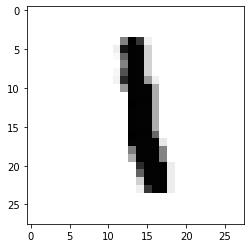

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0 145 255 211  31   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  32 237 253 252  71   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  11 175 253 252  71   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0 144 253 252  71   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  16 191 253 252  71   0   0   0   0   0   0   0   0 

In [51]:
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt
# 위 60000개 데이터 배열에서 0번째 원소를 흑백으로 출력
plt.imshow(x_train[6], cmap='Greys')
plt.show()

import sys
# 0번째 원소의 모든 데이터를 출력
for x in x_train[6]:
  for i in x:
    sys.stdout.write('%3d ' % i)
  sys.stdout.write('\n')

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

In [9]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [10]:
x_train.shape

(60000, 784)

In [11]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
x_train[59999]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
# 모델 구성
# 딥러닝 모델 구조 설정(2개층, 512개의 뉴런 연결, 10개 클래스 출력 뉴런, 784개 픽셀 input 값)
model = Sequential()
model.add(Dense(512, input_dim=(28*28), activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
# 4. 모델 훈련
# 딥러닝 구조 설정(loss 옵션을 다중 클래스에 적합한 sparse_categorical_crossentropy, 옵티마이저는??)
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [20]:
# 5. 모델 훈련
# verbose : integer. 0, 1, or 2.
# Verbosity mode.
# 0 = silent.
# 1 = progress bar.
# 2 = one line per epoch.
history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    steps_per_epoch = 50,
                    validation_steps = 50,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
50/50 [==============================] - 4s 64ms/step - loss: 0.5878 - accuracy: 0.8463 - val_loss: 0.2724 - val_accuracy: 0.9214
Epoch 2/50
50/50 [==============================] - 4s 70ms/step - loss: 0.2428 - accuracy: 0.9317 - val_loss: 0.2078 - val_accuracy: 0.9406
Epoch 3/50
50/50 [==============================] - 3s 58ms/step - loss: 0.1857 - accuracy: 0.9481 - val_loss: 0.1639 - val_accuracy: 0.9517
Epoch 4/50
50/50 [==============================] - 2s 50ms/step - loss: 0.1497 - accuracy: 0.9581 - val_loss: 0.1369 - val_accuracy: 0.9609
Epoch 5/50
50/50 [==============================] - 2s 50ms/step - loss: 0.1242 - accuracy: 0.9656 - val_loss: 0.1199 - val_accuracy: 0.9656
Epoch 6/50
50/50 [==============================] - 2s 49ms/step - loss: 0.1047 - accuracy: 0.9714 - val_loss: 0.1092 - val_accuracy: 0.9678
Epoch 7/50
50/50 [==============================] - 3s 51ms/step - loss: 0.0905 - accuracy: 0.9749 - val_loss: 0.0970 - val_accuracy: 0.9712
Epoch 8/50
50

In [21]:
# 6. 모델 저장
model.save('Predict_model.h5')

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


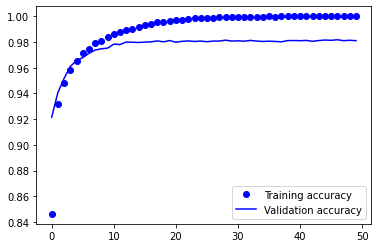

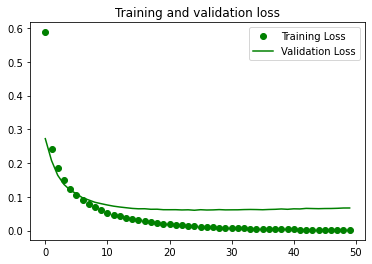

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label = 'Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.models import load_model
import cv2
import numpy as np

In [40]:
x_pred = cv2.imread('./numbers/33.png', cv2.IMREAD_GRAYSCALE)
x_pred.shape

(28, 28)

In [41]:
x_pred[0]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255], dtype=uint8)

In [42]:
x2_pred = ((np.array(x_pred) / 255) - 1) * -1

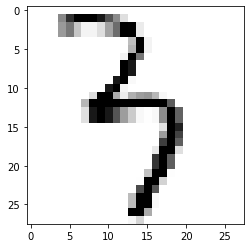

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  

In [43]:
plt.imshow(x2_pred, cmap='Greys')
plt.show()
for x in x2_pred:
  for i in x:
    sys.stdout.write('%3d' % i)
  sys.stdout.write('\n')

In [44]:
x2_pred = x2_pred.reshape(-1, 28*28)
x2_pred.shape

(1, 784)

In [46]:
model = load_model('Predict_model.h5')


In [47]:
res = (model.predict(x2_pred)>0.5).astype('int32')

print(res)

1/1 [==============================] - 0s 85ms/step
[[0 0 0 0 0 0 1 0 0 0]]
